# Production Returning, Leaving, Incoming Plot Book

In [260]:
# Dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.legend_handler import HandlerTuple
from matplotlib.legend_handler import HandlerBase
from PIL import Image


# path to TEMP folder
temp_folder = os.path.join(os.getcwd(), '..', 'TEMP')
# Data folder
data_folder = os.path.join(os.getcwd(), '..', 'data')
# Image folder
img_folder = os.path.join(os.getcwd(), '..', 'images')
# Logo folder
logo_folder = os.path.join(os.getcwd(), '..', 'images', 'logos')

# Path to FInal Pairwise Ranking From Last Season (2023-24) 
## For Use in sorting charts later potentially
pairwise_file = os.path.join(data_folder, 'final_pairwise_202324.csv')
pairwise_df = pd.read_csv(pairwise_file) # Load DF

# Path to school info [for logo mappiung] table (csv)
school_info_file = os.path.join(data_folder, 'arena_school_info.csv')
school_info_df = pd.read_csv(school_info_file)

# Load calculated table (csv)
calculated_file = os.path.join(temp_folder, 'final_team_production_sorted_v1.03.csv')
df = pd.read_csv(calculated_file)


# Path to calculated table (csv)

In [261]:
df.head()
# school_info_df.head()
pairwise_df.head()

,Rk,Team,PCWs,RPI,Rk_1,QWB-†,W-L-T,PwWin %,Wgtd Win % - ‡
0,1,Boston College,63,0.6298,1,0.0102,31-5-1 (2-0),0.8333,0.8324
1,2,Boston University,62,0.6046,2,0.0083,26-9-2 (2-3),0.7387,0.7467
2,3,Denver,61,0.5976,3,0.0076,28-9-3 (3-1),0.7208,0.7214
3,4,Michigan State,60,0.5906,4,0.0075,24-9-3 (0-1),0.7176,0.7226
4,5,Maine,58,0.5739,6,0.0053,23-11-2 (1-1),0.6667,0.6740


### Clean the Pairwise Table
- remove . in names
- replace - with spaces

In [262]:
## Clean up name sin Pairwaise DF for matching
pairwise_df['Team'] = pairwise_df['Team'].str.replace('.', '')
pairwise_df['Team'] = pairwise_df['Team'].str.replace('-', ' ')

## Conference Dictionaries - Styles, Colors, Ect

In [263]:
## Conference Membership

atlantic = ['Air Force', "American Intl", 'Army', 'Bentley', 'Canisius', 'Holy Cross', 'Mercyhurst', 
            'Niagara', 'RIT', 'Robert Morris', 'Sacred Heart', 'St Lawrence']

big_ten = ['Michigan', 'Michigan State', 'Minnesota', 'Notre Dame', 'Ohio State', 'Penn State', 'Wisconsin']

ccha = ['Augustana', 'Bemidji State', 'Bowling Green', 'Ferris State', 'Lake Superior', 'Michigan Tech', 
        'Minnesota State', 'Northern Michigan', 'St Thomas']

ecac = ['Brown', 'Clarkson', 'Colgate', 'Cornell', 'Dartmouth', 'Harvard', 'Princeton', 'Quinnipiac',
        'Rensselaer', 'St Lawrence', 'Union', 'Yale']

hockey_east = ['Boston College', 'Boston University', 'Connecticut', 'Maine', 'Massachusetts', 'Mass Lowell',
                'Merrimack', 'New Hampshire', 'Northeastern', 'Providence', 'Vermont']

nchc = ['Arizona State', 'Colorado College', 'Denver', 'Miami', 'Minnesota Duluth', 'North Dakota', 'Omaha', 'St Cloud State',
        'Western Michigan']

independents = ['Alaska Anchorage', 'Alaska', 'Lindenwood', 'Long Island', 'Stonehill']

# Create a dictionary of {Team: logo_abv} for each team with .png added to the end
logo_mapping = {}

for index, row in school_info_df.iterrows():
    logo_mapping[row['Team']] = row['logo_abv'] + '.png'

# print(logo_mapping)


### Reorder each conference based on Final 2023-24 Pairwise Ranking

#### Add Logos to Plot Function

In [264]:
def add_logos_to_plot(data_df, x_col, y_col, logo_mapping, logo_folder, ax, teams_in_region):
    for team in teams_in_region:
        team_data = data_df[data_df['Team'] == team]
        if not team_data.empty:
            x = team_data[x_col].values[0]
            y = team_data[y_col].values[0]
            logo_path = os.path.join(logo_folder, logo_mapping.get(team, ""))

            # Add this print statement to check the file paths
            print(f"Attempting to load logo for {team}: {logo_path}")
            
            if logo_path:
                try:
                    logo_img = plt.imread(logo_path)
                    imagebox = OffsetImage(logo_img, zoom=0.15)  # Adjust zoom as needed
                    ab = AnnotationBbox(imagebox, (x, y), frameon=False, xybox=(10, 20), boxcoords="offset points", pad=0)
                    ax.add_artist(ab)
                except Exception as e:
                    print(f"Error adding logo for {team}: {e}")  # Add this exception handling


##### Style

In [265]:
figure_size = (10, 10)


## FONT SETTINGS
font_properties = {'fontsize': 24, 'fontweight': 'bold', 'family': 'Verdana'}  # You can change 'serif' to any font family you prefer


color_scheme = {
    'Returning Goals': '#2E8B57',  # Dark Green
    'Returning Assists': '#90EE90',  # Light Green
    'Departed Goals': '#B22222',  # Dark Red
    'Departed Assists': '#FF7F7F',  # Light Red
    'New Goals': '#1E90FF',  # Dark Blue
    'New Assists': '#87CEFA'  # Light Blue
}

# Plot

C:\Users\jbanc\AppData\Local\Temp\ipykernel_7196\2089418265.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Rk'] = filtered_df['Team'].map(pairwise_df.set_index('Team')['Rk'])


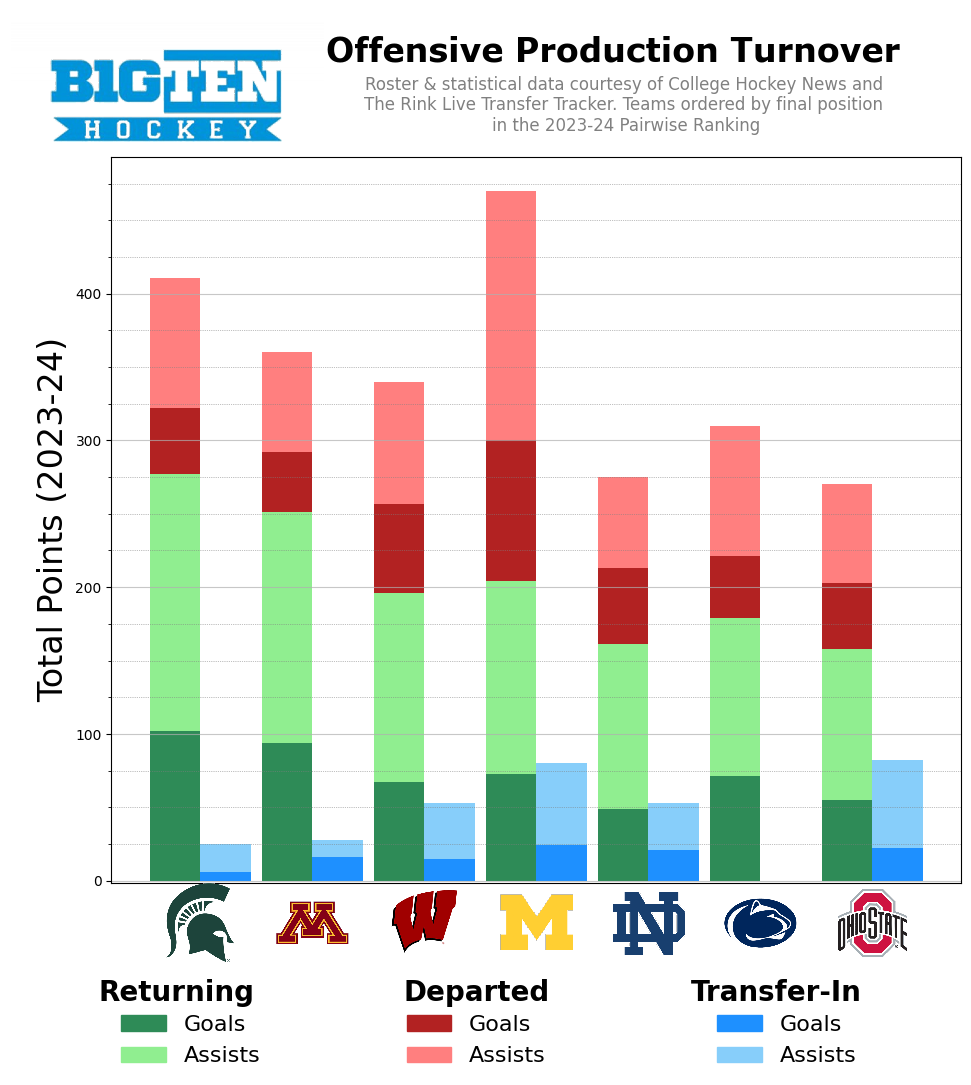

C:\Users\jbanc\AppData\Local\Temp\ipykernel_7196\2089418265.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Rk'] = filtered_df['Team'].map(pairwise_df.set_index('Team')['Rk'])


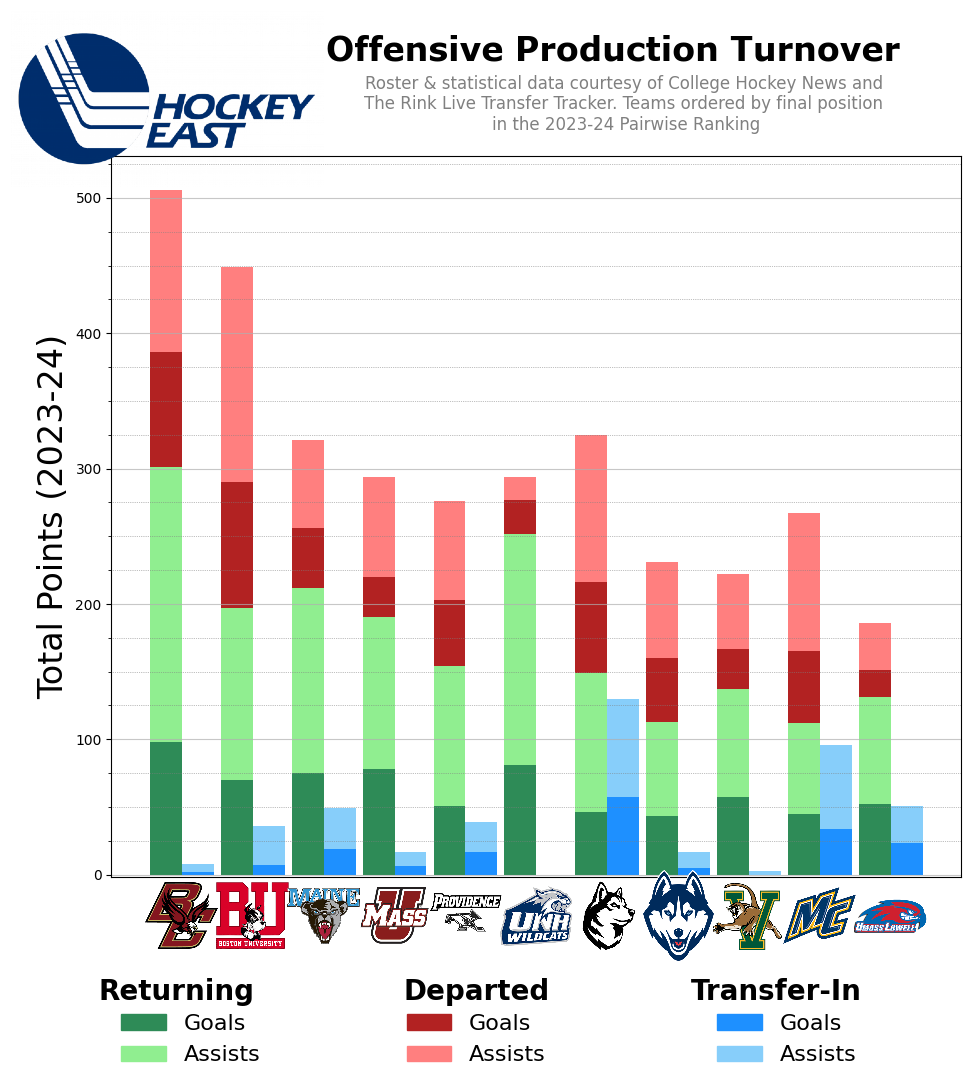

In [266]:
# Fix the add_logos_to_plot function to avoid KeyError
def add_logos_to_plot(data_df, team_names, logo_mapping, logo_folder, ax, bar_width):
    for i, team in enumerate(team_names):
        logo_file = logo_mapping.get(team, "")
        if logo_file:
            logo_path = os.path.join(logo_folder, logo_file)
            try:
                logo_img = plt.imread(logo_path)
                imagebox = OffsetImage(logo_img, zoom=0.175)  # Adjust zoom as needed
                # Adjust the positioning of logos below the x-axis
                ab = AnnotationBbox(imagebox, (i + bar_width / 2, -0.055), xycoords=('data', 'axes fraction'), frameon=False)
                ax.add_artist(ab)
            except Exception as e:
                print(f"Error adding logo for {team}: {e}")

# Define the function to create the stacked bar chart for each conference
def plot_conference_production(df, conference_teams, conference_name, logo_mapping, logo_folder, ax=None, conference_logo=None):
    """
    Function to create a stacked bar chart for team production in a specific conference.

    Parameters:
    - df: DataFrame containing team production data.
    - conference_teams: List of teams in the conference.
    - conference_name: Name of the conference.
    - logo_mapping: Dictionary mapping teams to their logo filenames.
    - logo_folder: Path to the folder containing the logos.
    - ax: Optional Matplotlib axis object for plotting. If None, a new plot will be created.
    """
    
    # Filter the dataframe for teams in the conference
    filtered_df = df[df['Team'].isin(conference_teams)]

    # Order the teams based on their RK in the pairwise_df
    filtered_df['Rk'] = filtered_df['Team'].map(pairwise_df.set_index('Team')['Rk'])
    filtered_df = filtered_df.sort_values(by='Rk')
    
    # Check if ax is provided, otherwise create a new figure and axis
    if ax is None:
        fig, ax = plt.subplots(figsize=figure_size)

    # Extract the data needed for the plot
    team_names = filtered_df['Team'].tolist()
    g_returning = filtered_df['g_Returning'].values
    a_returning = filtered_df['a_Returning'].values
    g_departed = filtered_df['g_Departed'].values
    a_departed = filtered_df['a_Departed'].values
    incoming_g = filtered_df['incoming_g'].values
    incoming_a = filtered_df['incoming_a'].values

    # Plot the first stack (returning and departed goals/assists)
    bottom_values = np.zeros(len(team_names))
    bar_width = 0.45  # Adjustable bar width for fine-tuning spacing
    bars1 = ax.bar(team_names, g_returning, bottom=bottom_values, color=color_scheme['Returning Goals'], width=bar_width, label='Goals Returning')
    bottom_values += g_returning
    bars2 = ax.bar(team_names, a_returning, bottom=bottom_values, color=color_scheme['Returning Assists'], width=bar_width, label='Assists Returning')
    bottom_values += a_returning
    bars3 = ax.bar(team_names, g_departed, bottom=bottom_values, color=color_scheme['Departed Goals'], width=bar_width, label='Goals Departed')
    bottom_values += g_departed
    bars4 = ax.bar(team_names, a_departed, bottom=bottom_values, color=color_scheme['Departed Assists'], width=bar_width, label='Assists Departed')

    # Plot the second stack (incoming goals/assists)
    x_positions = np.arange(len(team_names)) + bar_width  # Shift for the second stack
    bars5 = ax.bar(x_positions, incoming_g, color=color_scheme['New Goals'], width=bar_width, label='Goals Incoming')
    bars6 = ax.bar(x_positions, incoming_a, bottom=incoming_g, color=color_scheme['New Assists'], width=bar_width, label='Assists Incoming')

    # Customize the plot
    ## Using Built in Title Function
    # ax.set_title(f'Offensive Production Turnover', 
    #         fontsize=20, weight='bold',
    #         pad = -10,
    #         loc='right')

    ## Using figure.text to place title for more control
    fig.text(0.35, 0.925, 'Offensive Production Turnover', fontdict=font_properties)

        # Add note with data sources underneith title
    fig.text(0.65, 0.855, 
            "Roster & statistical data courtesy of College Hockey News and \nThe Rink Live Transfer Tracker. Teams ordered by final position \nin the 2023-24 Pairwise Ranking", 
            ha='center', fontsize=12, color='gray')

    ax.set_ylabel('Total Points (2023-24)', fontsize=24) #, weight='bold')
    ax.set_xticks(np.arange(len(team_names)) + bar_width / 2)
    ax.set_xticklabels(team_names, fontsize=16)

    # Expand y-axis to allow space for the logos below the bars
    ax.set_ylim(-1.5, ax.get_ylim()[1])  # Adjust this if needed to give more space below

    # Add logos using corrected x-axis positions and team names, passing bar_width
    add_logos_to_plot(filtered_df, team_names, logo_mapping, logo_folder, ax, bar_width)

    # Add and Adjust grid marks
    ax.yaxis.grid(True, linestyle='-', alpha=0.7)
    # add minor grid marks ever 25 points
    ax.yaxis.set_minor_locator(plt.MultipleLocator(25))
    ax.yaxis.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
    

    # Remove x-ticks and labels
    ax.set_xticks([])
    ax.set_xticklabels([])


    ############################
    ### ADD CONFERENCE LOGOS
    ############################
        # Data for conferences
    conference_names = ['Atlantic', 'Big Ten', 'CCHA', 'ECAC', 'Hockey East', 'NCHC', 'Independents']


        # Add conference logos below the bars as x-tick labels
    conference_logo_mapping = {
        'Atlantic': 'atlantic.png',
        'Big Ten': 'big_ten.png',
        'CCHA': 'ccha.png',
        'ECAC': 'ecac.png',
        'Hockey East': 'hockey_east.png',
        'NCHC': 'nchc.png',
        'Independents': 'independent.png'
    }
        ## **Add conference logo to the upper-right-hand corner**
    if conference_logo:
        logo_path = os.path.join(logo_folder, 'conference', conference_logo)
        img = plt.imread(logo_path)
        
        # Set a desired logo size
        logo_zoom = 0.45  # Adjust this value to control the logo size
        
        # Create an OffsetImage for the conference logo
        imagebox = OffsetImage(img, zoom=logo_zoom)
        
        # Add the logo to the upper-left-hand corner of the plot
        ab = AnnotationBbox(imagebox, (0.25, 1.2), xycoords='axes fraction',
                            box_alignment=(1, 1), pad=0.1, frameon=False)
        ax.add_artist(ab)

############################
    ### CUSTOM LEGEND ###
############################
    # Creating the patches for the legend
    legend_patches = [
        mpatches.Patch(color=color_scheme['Returning Goals'], label='Goals'),
        mpatches.Patch(color=color_scheme['Returning Assists'], label='Assists'),
        mpatches.Patch(color=color_scheme['Departed Goals'], label='Goals'),
        mpatches.Patch(color=color_scheme['Departed Assists'], label='Assists'),
        mpatches.Patch(color=color_scheme['New Goals'], label='Goals'),
        mpatches.Patch(color=color_scheme['New Assists'], label='Assists')
    ]

    legend_header_size = 20
    legend_label_font = 16
    
    # Custom grid legend layout using text and patches
    fig.text(0.2, -0.015, 'Returning', fontsize=legend_header_size, weight='bold', ha='center')
    fig.text(0.5, -0.015, 'Departed', fontsize=legend_header_size, weight='bold', ha='center')
    fig.text(0.8, -0.015, 'Transfer-In', fontsize=legend_header_size, weight='bold', ha='center')


    # Adjust legend placement to be centered under the headers
    fig.legend(handles=legend_patches[:2], loc='lower left', bbox_to_anchor=(0.125, -0.1), frameon=False, fontsize=legend_label_font)  # Goals/Assists under 'Returning'
    fig.legend(handles=legend_patches[2:4], loc='lower center', bbox_to_anchor=(0.5, -0.1), frameon=False, fontsize=legend_label_font)  # Goals/Assists under 'Departed'
    fig.legend(handles=legend_patches[4:], loc='lower right', bbox_to_anchor=(0.9, -0.1), frameon=False, fontsize=legend_label_font)  # Goals/Assists under 'Transfers-In'

    # sAVE THE oUTPUT iMAGE TO THE tEMP fOLDER
    output_file = os.path.join(temp_folder, f'{conference_name}_production_turnover_v1.png')
    plt.savefig(output_file, bbox_inches='tight')

    # Display the plot
    plt.tight_layout()
    plt.show()

# Example call for one of the conferences (e.g., Big Ten)
# plot_conference_production(df, big_ten, "B1G", logo_mapping, logo_folder)
plot_conference_production(df, big_ten, "B1G", logo_mapping, logo_folder, conference_logo='big_ten.png')
plot_conference_production(df, hockey_east, "Hockey East", logo_mapping, logo_folder, conference_logo='hockey_east.png')



## OLD ORIGNAL